In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from warnings import filterwarnings

filterwarnings("ignore")

In [2]:

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
#Check for missing values
print("\nMissing values in the dataset:\n", df.isnull().sum())


Missing values in the dataset:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsIn

In [4]:
# Check for duplicate records
duplicates = df.duplicated().sum()
print("\nNumber of duplicate records:", duplicates)


Number of duplicate records: 0


In [5]:
df1 = df.select_dtypes('object')
df1

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [6]:
df2 = df.select_dtypes('int64')
df2

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [7]:
df1.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [8]:
#Some of columns can be removed, because their values do not affect the analysis results.
#Over18: All values are Y
#EmployeeCount: all values are 1.0
#StandardHours: all values are 80.0
#EmployeeNumber: is the id of the employee that their values do not affect the analysis results.
#remove 4 columns

df = df.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

In [9]:
df.shape

(1470, 31)

In [10]:
#Renaming
# Define a mapping dictionary for each column
education_mapping = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
env_satisfaction_mapping = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_involvement_mapping = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_satisfaction_mapping = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
performance_rating_mapping = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
relationship_satisfaction_mapping = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
work_life_balance_mapping = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}

# Use the replace function to rename values in the DataFrame
df['Education'] = df['Education'].replace(education_mapping)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace(env_satisfaction_mapping)
df['JobInvolvement'] = df['JobInvolvement'].replace(job_involvement_mapping)
df['JobSatisfaction'] = df['JobSatisfaction'].replace(job_satisfaction_mapping)
df['PerformanceRating'] = df['PerformanceRating'].replace(performance_rating_mapping)
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].replace(relationship_satisfaction_mapping)
df['WorkLifeBalance'] = df['WorkLifeBalance'].replace(work_life_balance_mapping)

**Relationship between indicators**

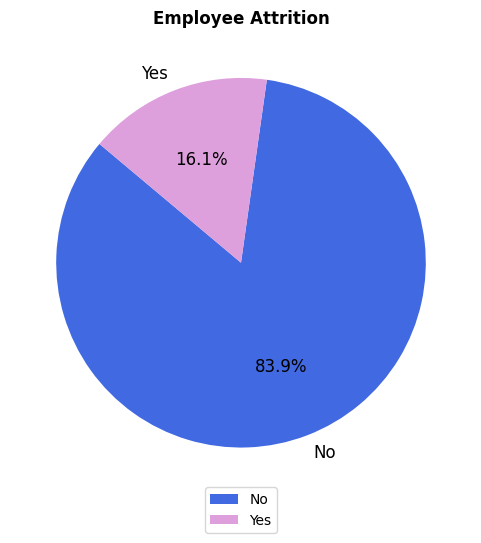

In [11]:
#Employee Attrition
attrition_counts = df['Attrition'].value_counts()

colors = ['royalblue','plum','mediumpurple','darkorchid','yellowgreen','lightgreen','yellow','gold','orange']


plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Employee Attrition',fontsize=12, fontweight = 'bold')
plt.legend(["No","Yes"], loc="lower center",bbox_to_anchor=(0.5, -0.1))
plt.show()

In [12]:
# graph variables by sub-group
cat_cols = df.select_dtypes(['object']).columns

cat_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
      dtype='object')

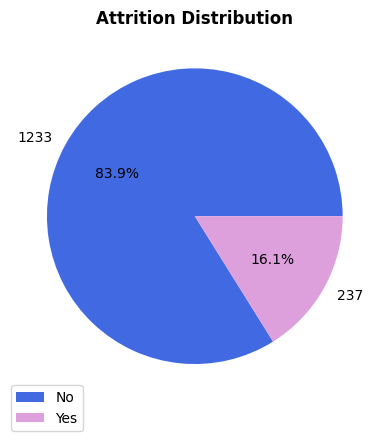

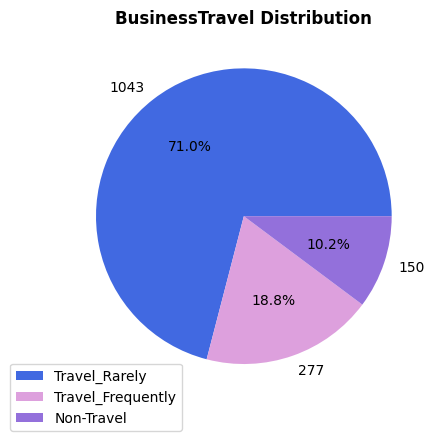

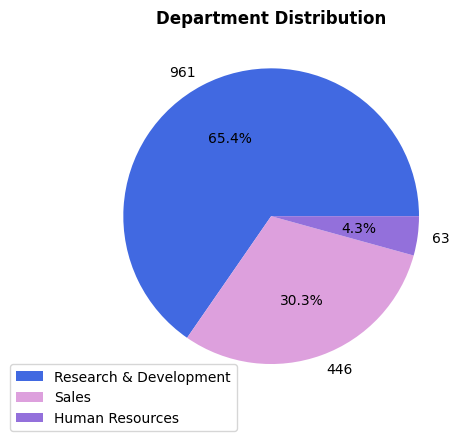

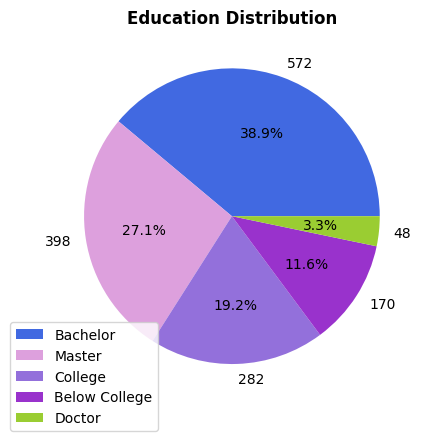

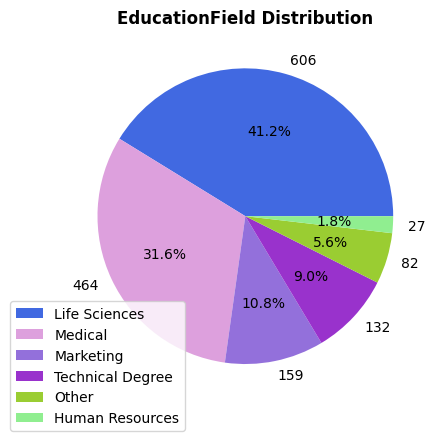

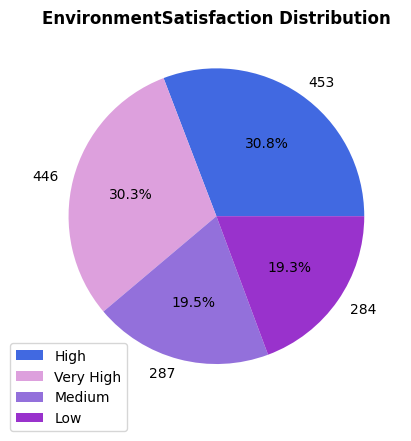

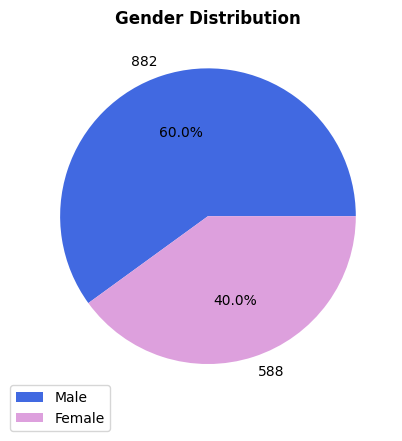

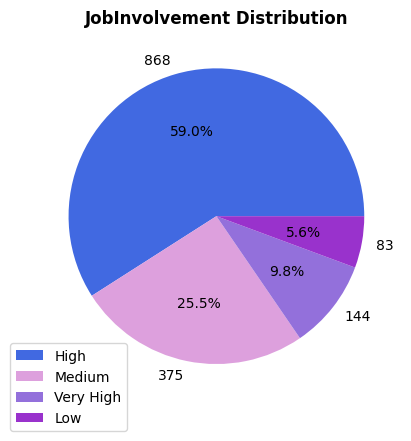

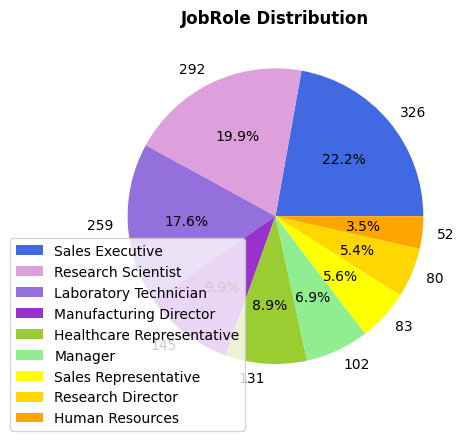

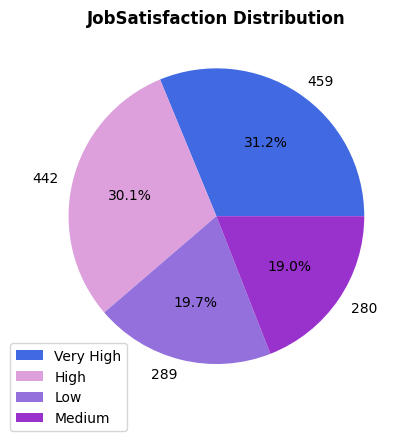

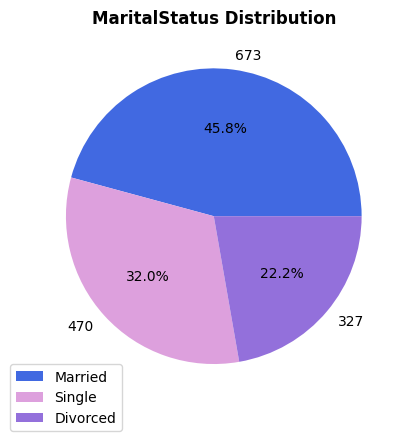

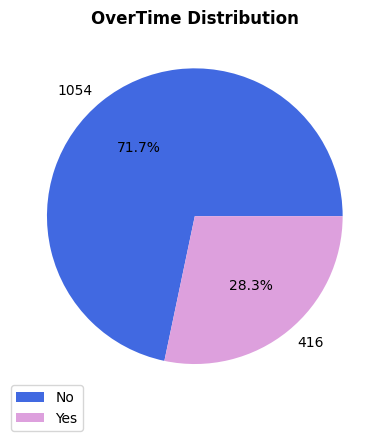

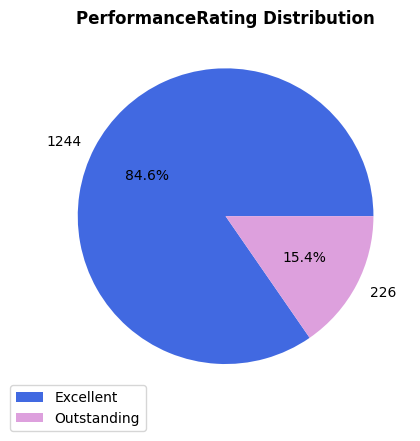

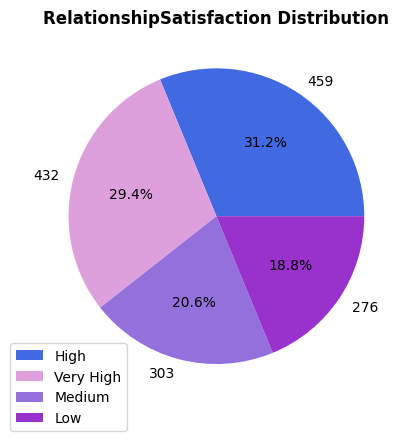

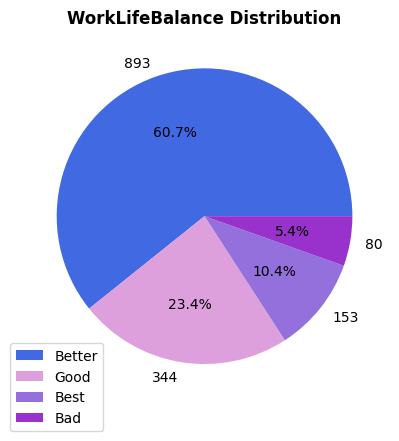

In [13]:
for col in cat_cols:
    plt.pie(df[col].value_counts(), labels=df[col].value_counts().values, colors=colors,autopct='%1.1f%%')
    plt.title(col+" Distribution", fontweight = 'bold')
    plt.legend(df[col].value_counts().index, loc="lower center",bbox_to_anchor=(0.1, -0.1))
    plt.show()

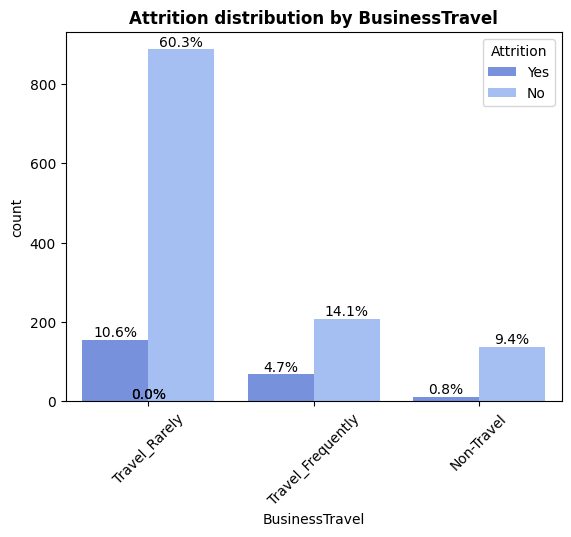

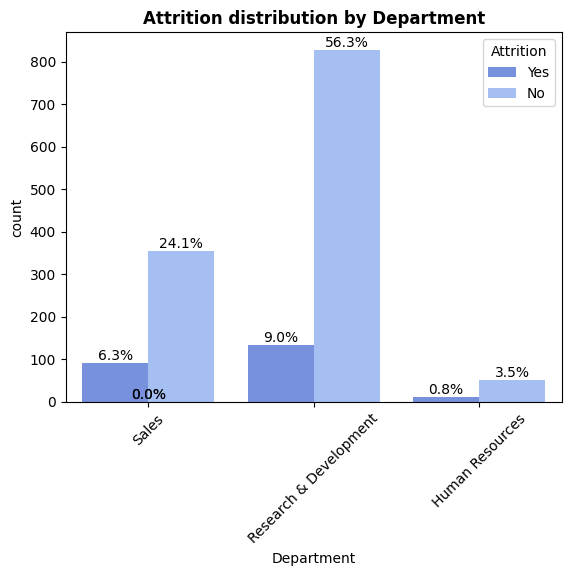

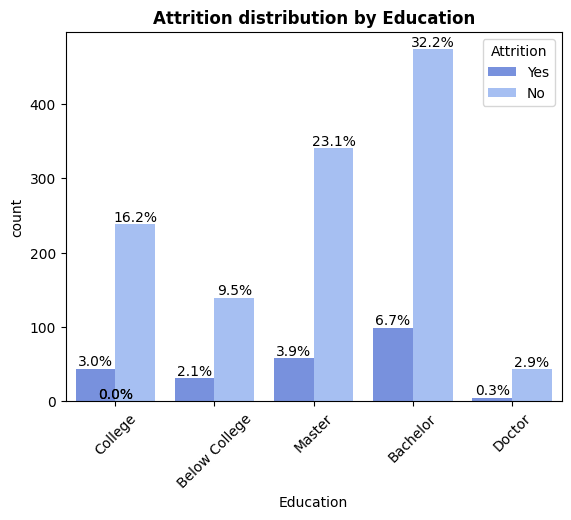

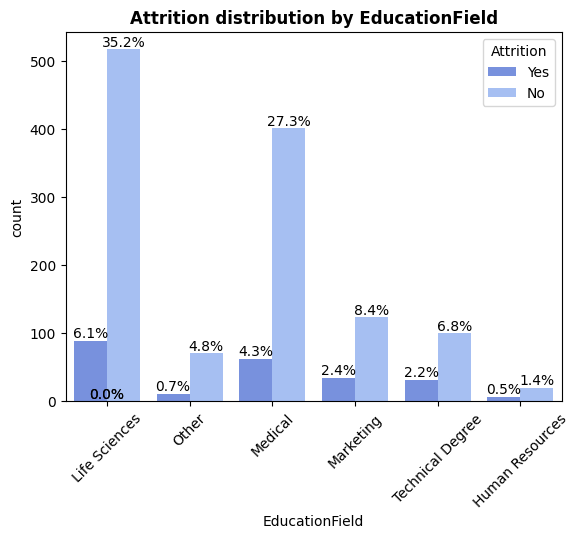

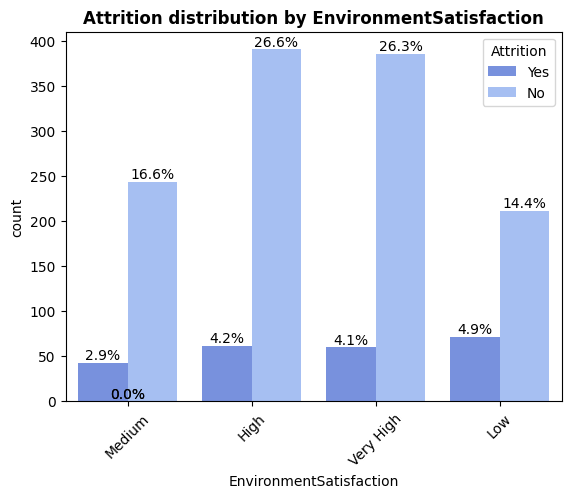

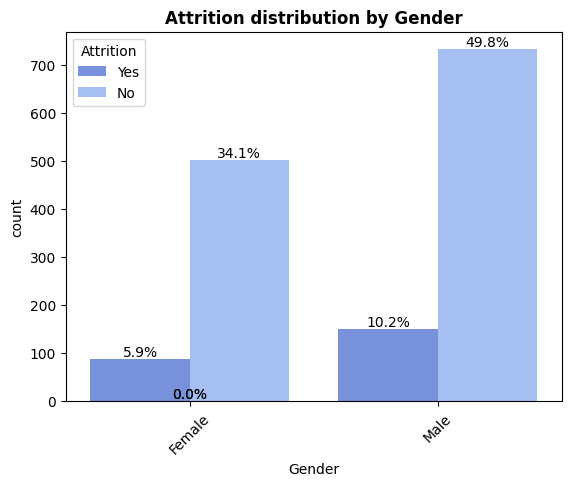

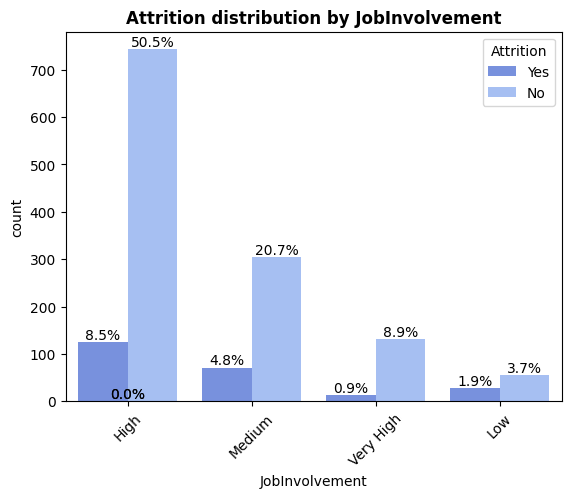

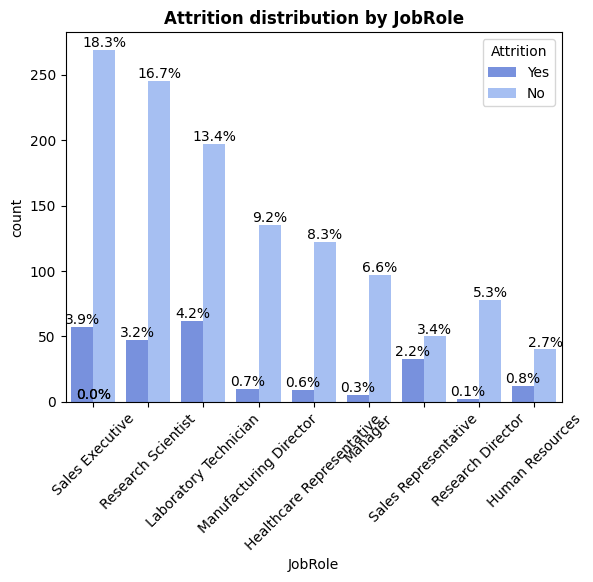

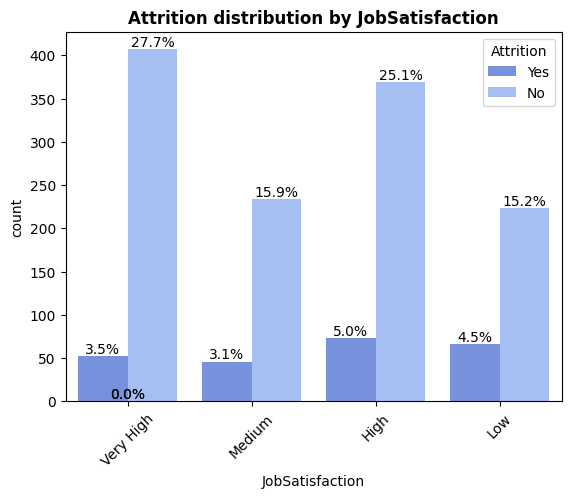

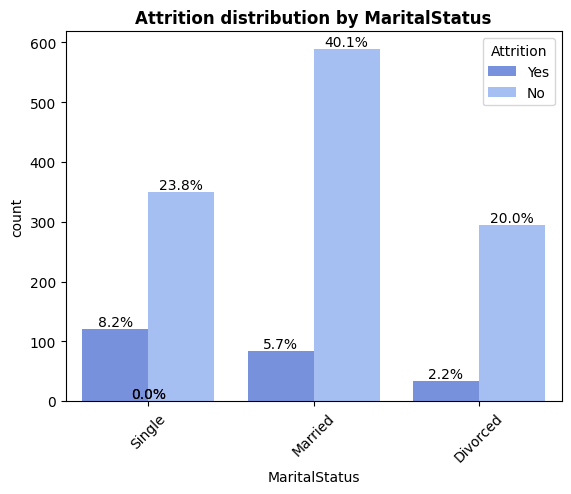

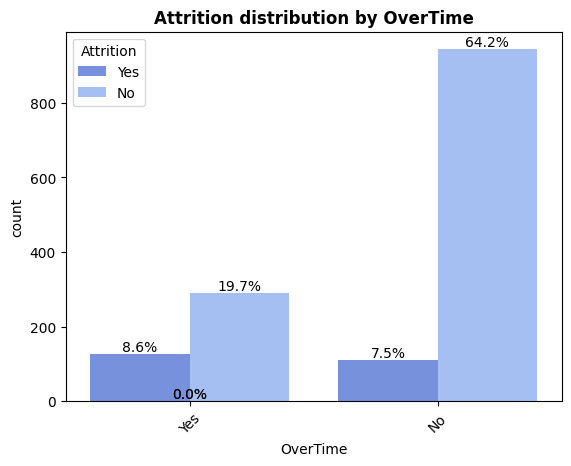

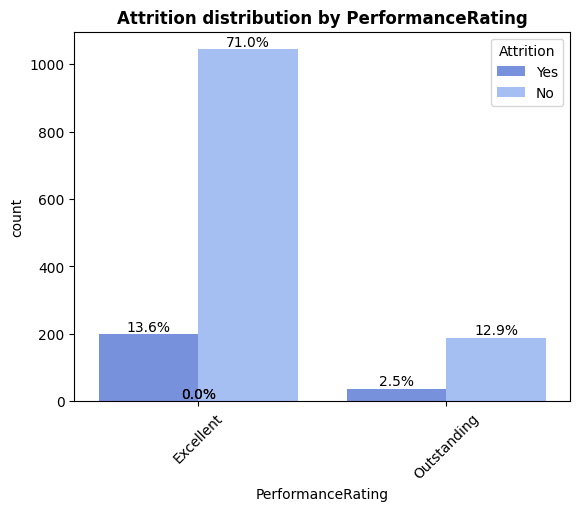

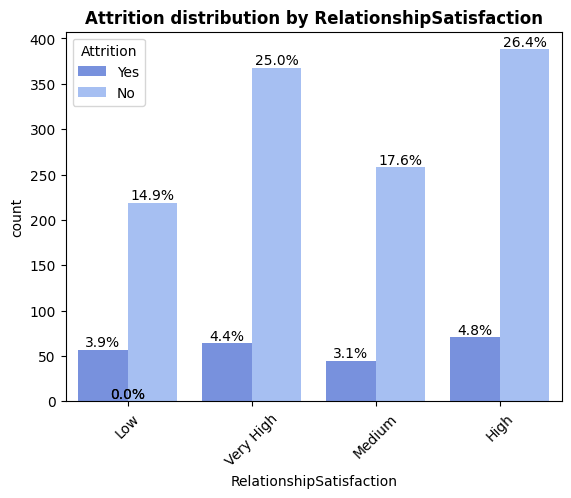

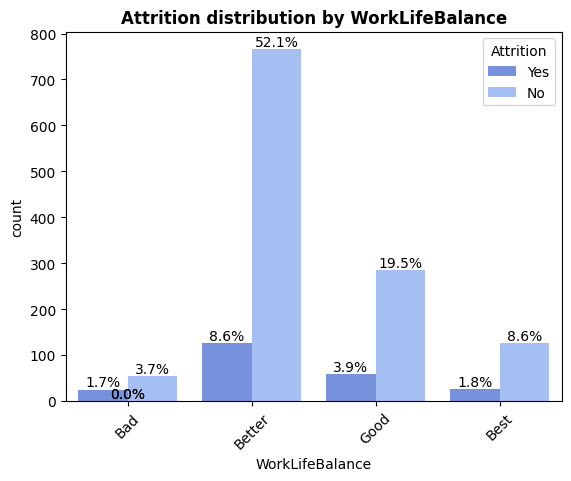

In [14]:
# view Barplot of other cat in conjunction with Attrition
cat_cols_2 = df.drop('Attrition',axis=1).select_dtypes(['object']).columns

sns.set_palette("coolwarm")

for col in cat_cols_2:
    sns.countplot(x=col, hue='Attrition', data=df)
    plt.title("Attrition distribution by " + col,fontweight = "bold")
    plt.xticks(rotation=45)
    ax = plt.gca()
    
    total_height = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / len(df[col].dropna()))
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show()

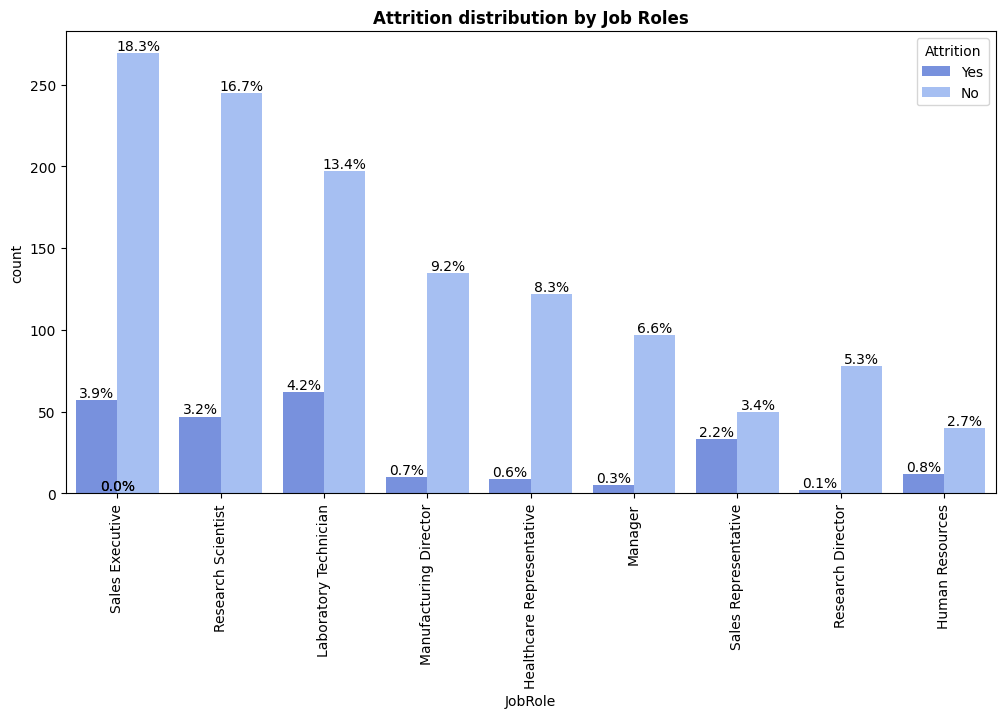

In [15]:
# Attrition distribution by Job Roles
sns.set_palette("coolwarm")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="JobRole", hue='Attrition', data=df)

# Add percentage labels to each bar
total_height = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Add a title and rotate x-axis labels
plt.title("Attrition distribution by Job Roles", fontweight="bold")
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [16]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

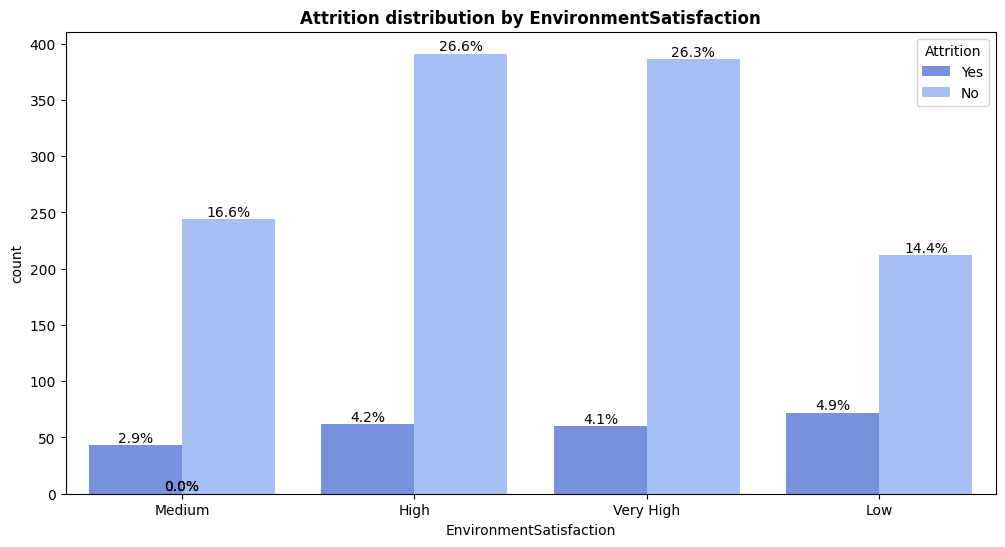

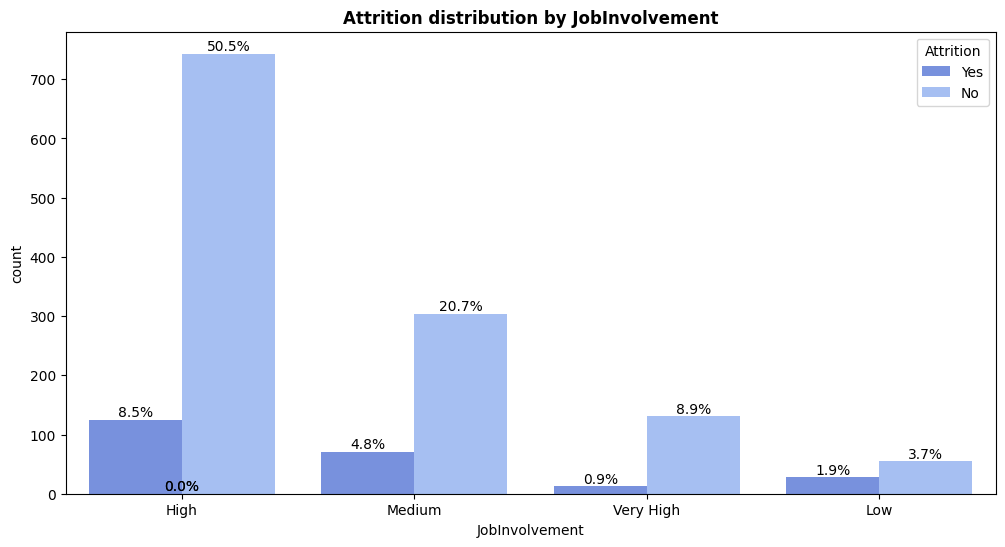

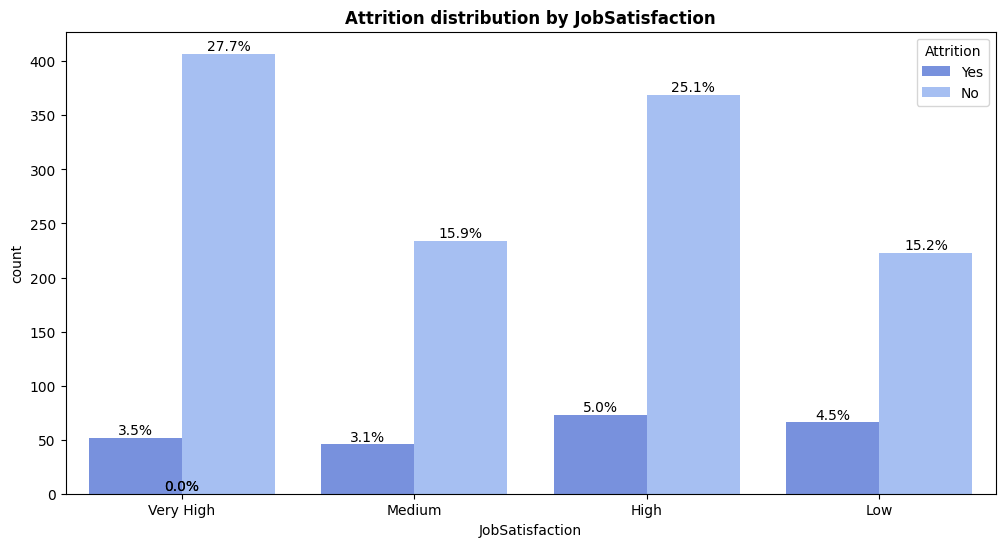

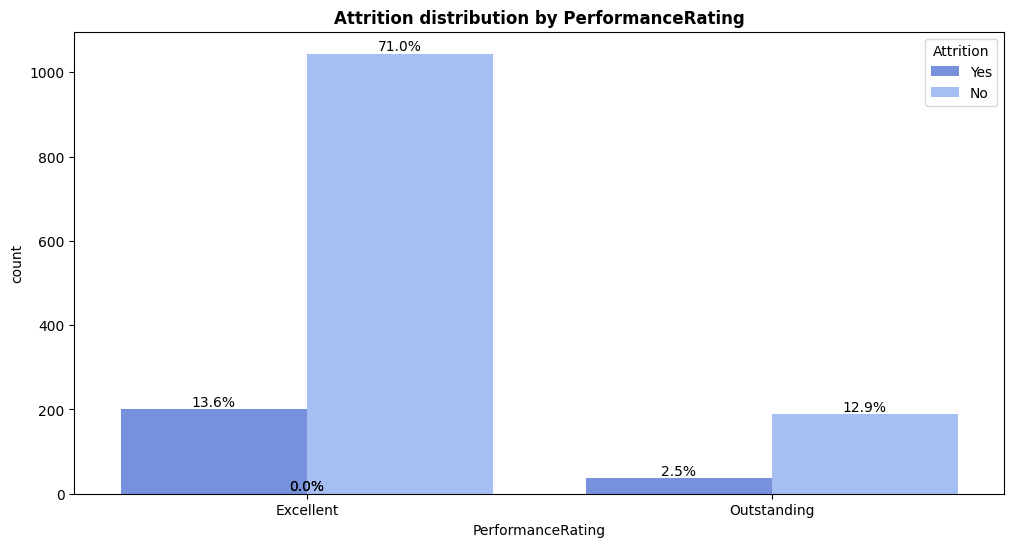

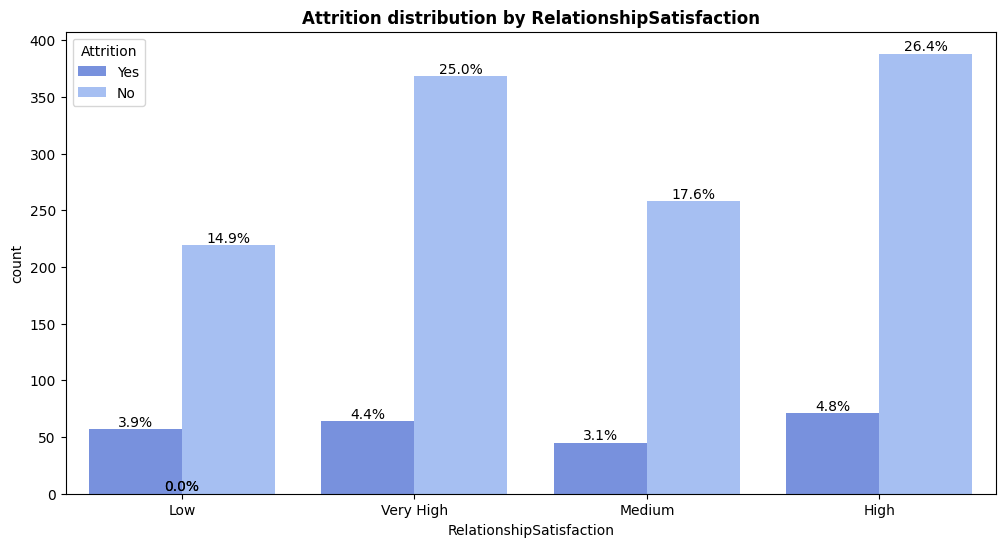

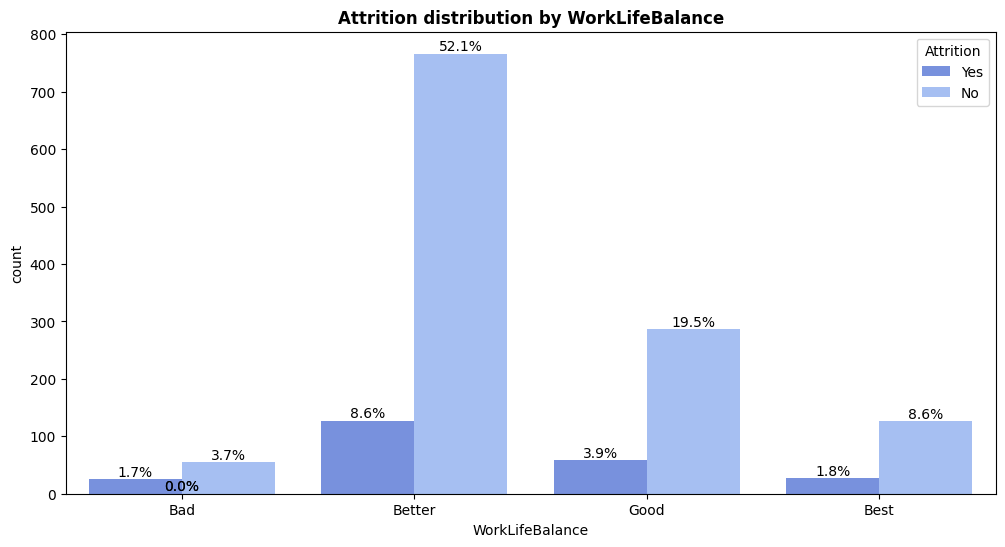

In [17]:
rating_cols = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating',
              'RelationshipSatisfaction','WorkLifeBalance']

for col in rating_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col, hue='Attrition', data=df)
    ax = plt.gca()
    
    total_height = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
    
    plt.title("Attrition distribution by " + col, fontweight = "bold")
    plt.show()

In [18]:
# graphing columns that have numeric metrics
num_cols = ['Age', 'DistanceFromHome','MonthlyIncome','NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

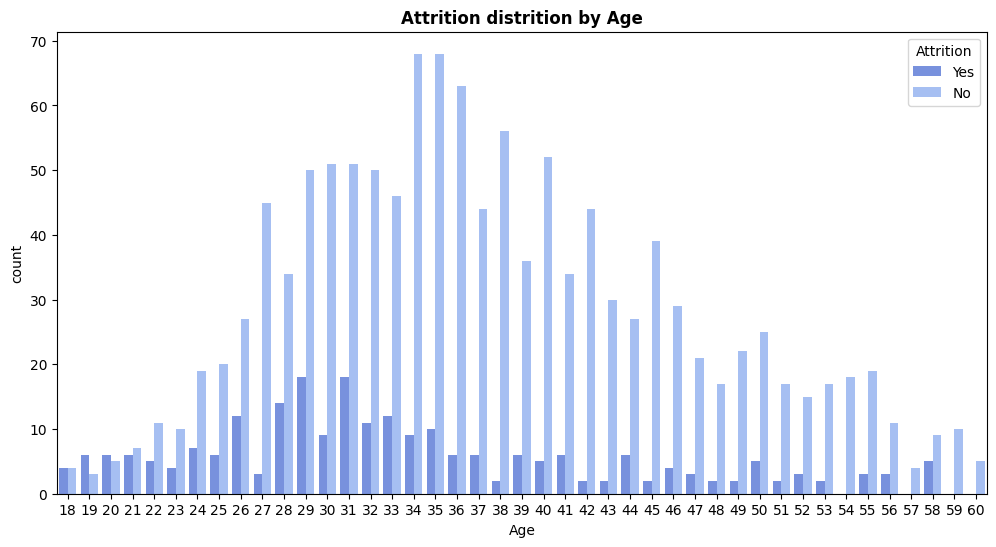

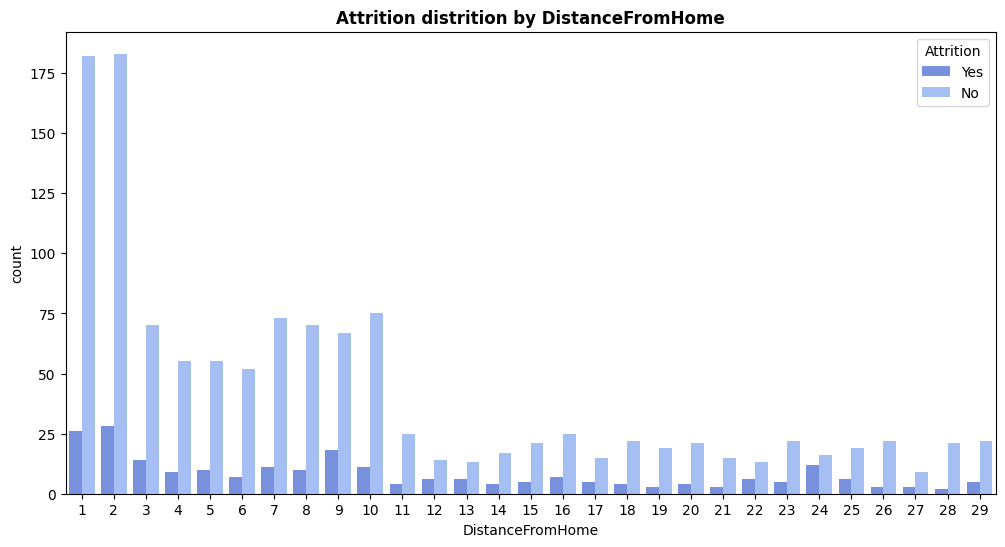

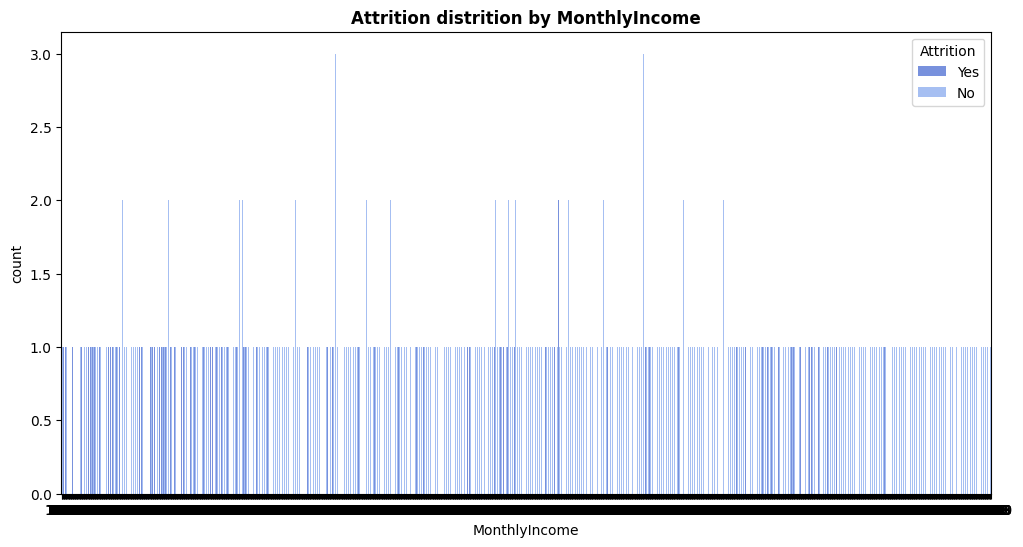

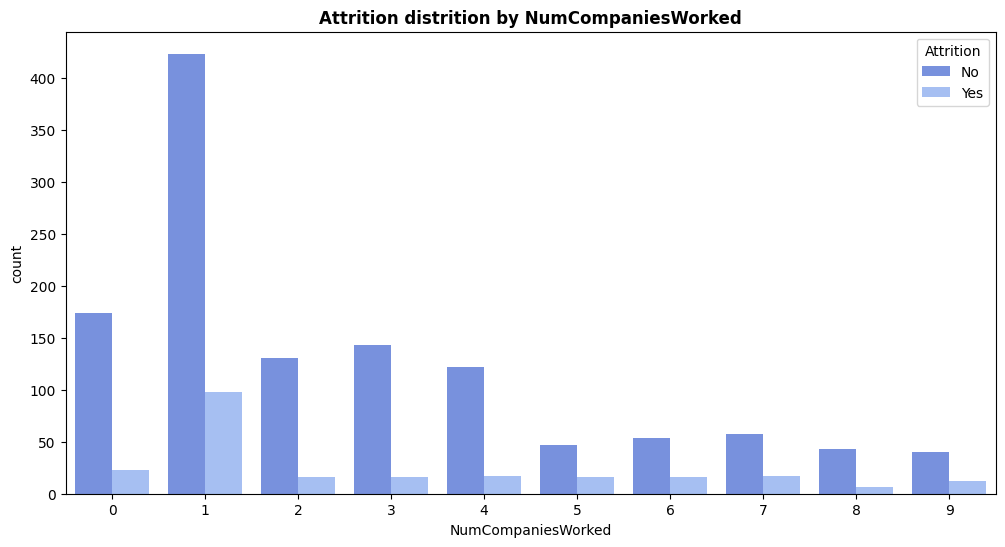

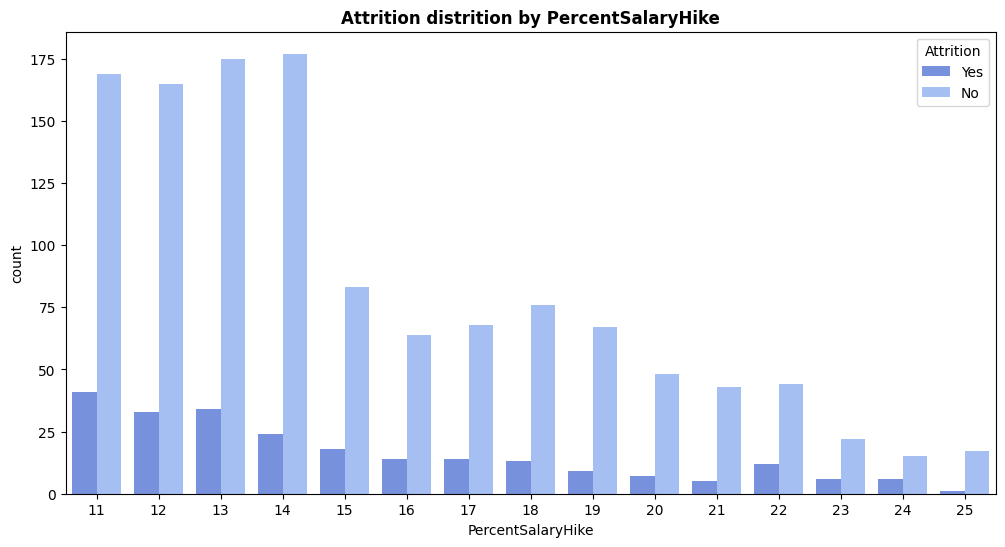

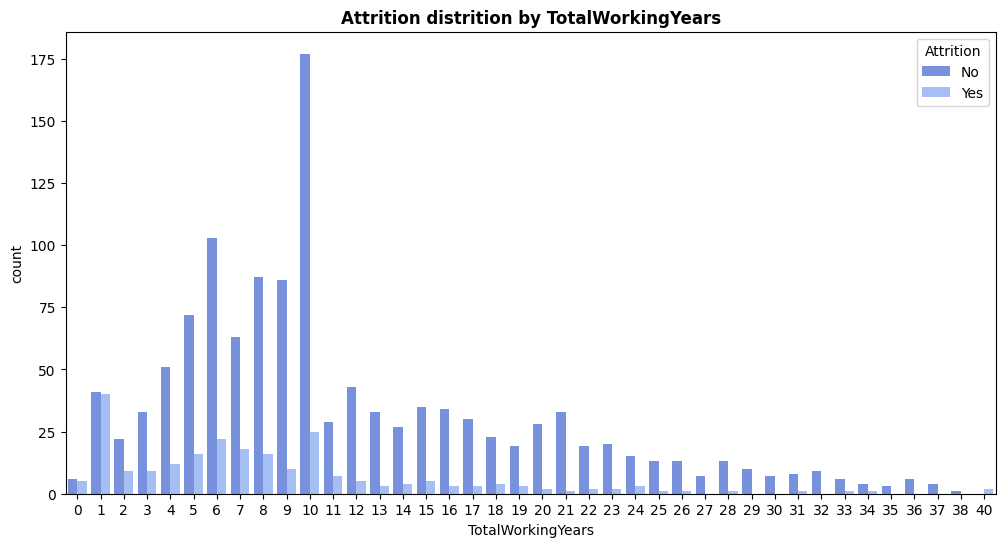

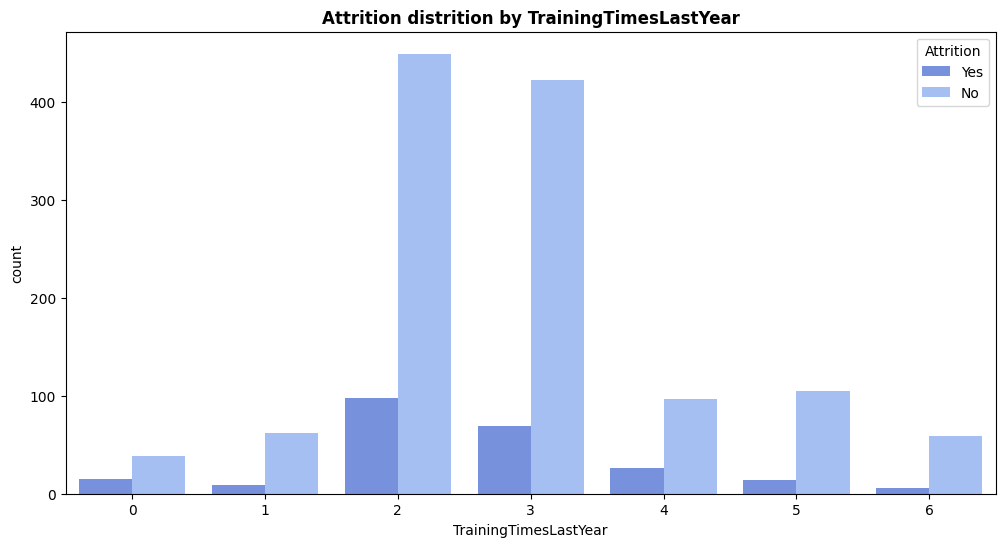

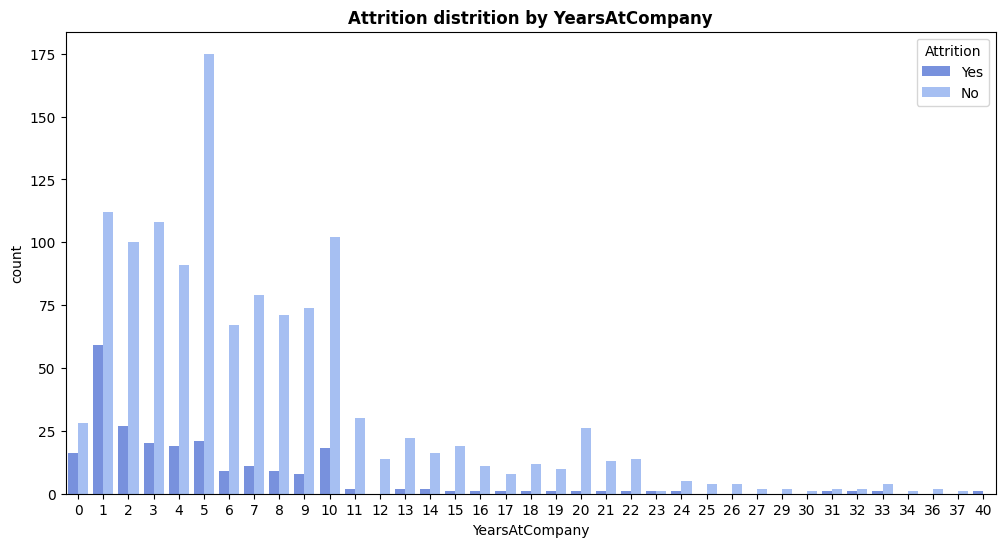

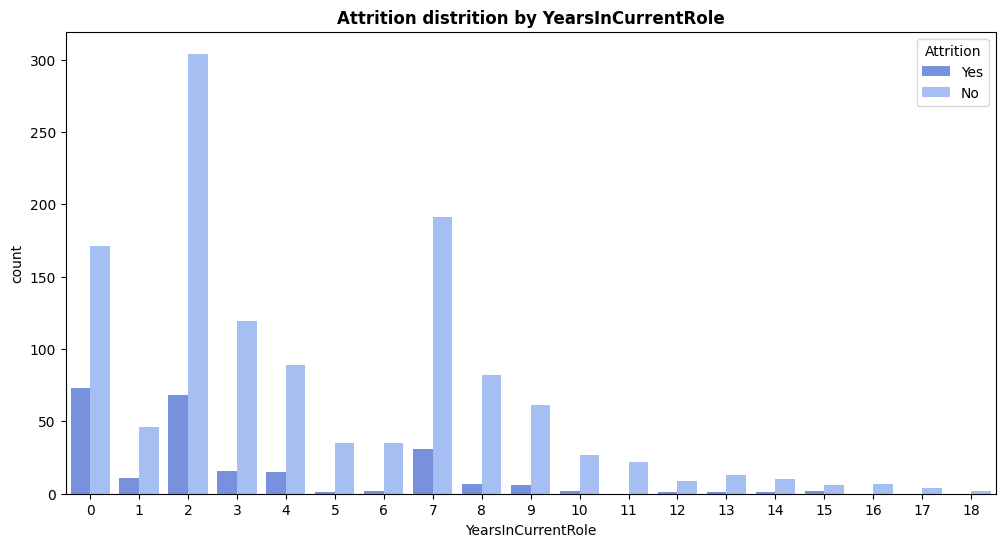

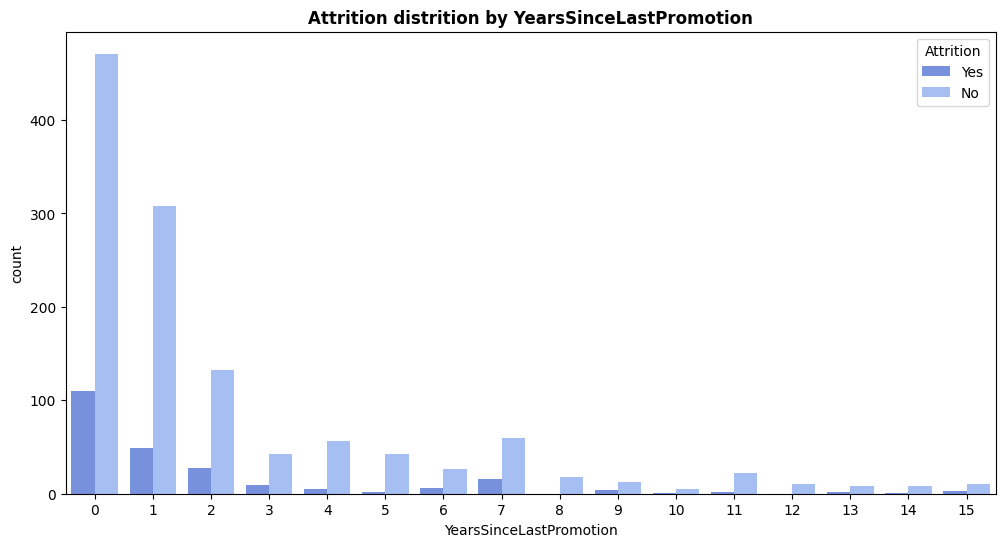

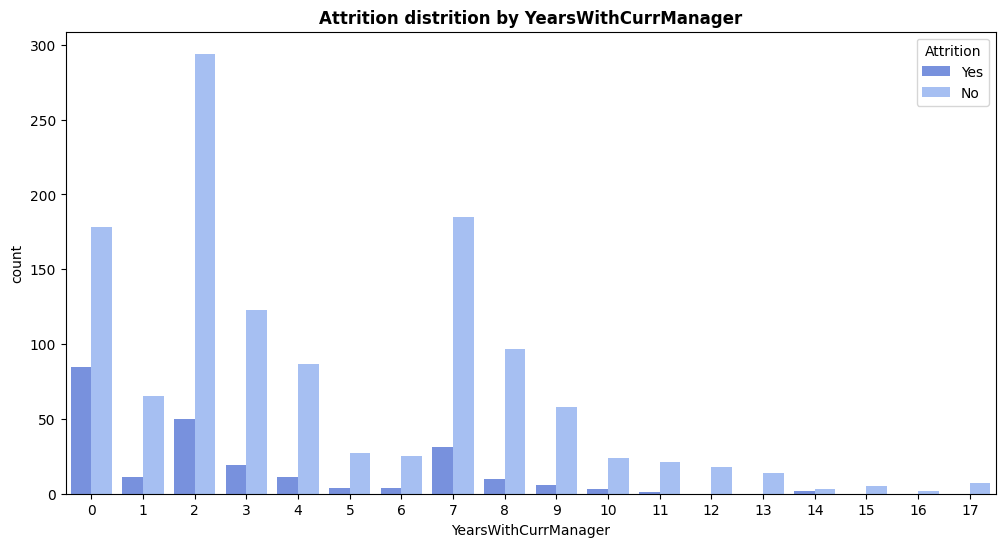

In [19]:
for col in num_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col, hue='Attrition', data=df)
    plt.title("Attrition distrition by " + col, fontweight = "bold")
    plt.show()

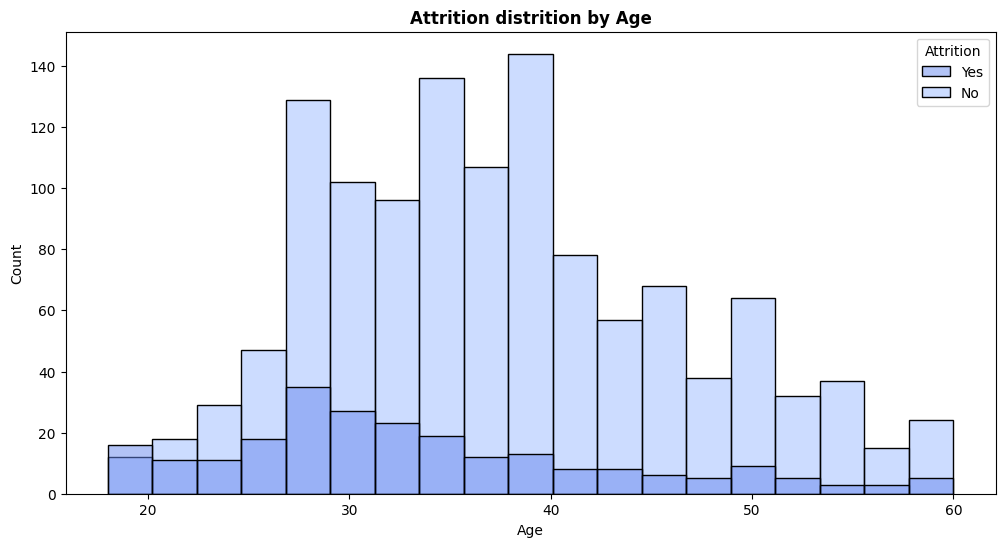

In [20]:
# Age Distribution by Attrition
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="Age", hue='Attrition')
plt.title("Attrition distrition by Age" , fontweight = "bold")
plt.show()

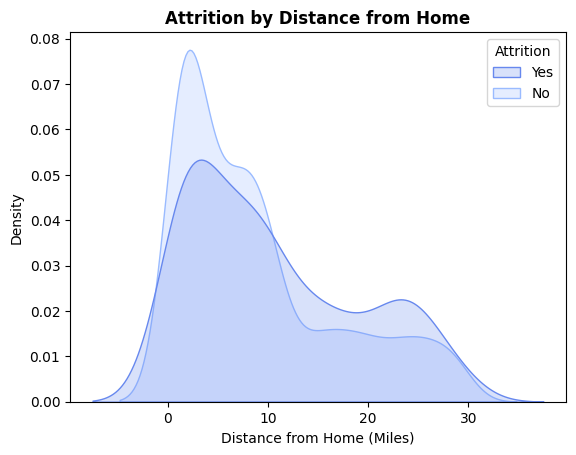

In [21]:
sns.kdeplot(data=df, x='DistanceFromHome', hue='Attrition', fill=True, common_norm=False)
plt.title('Attrition by Distance from Home', fontweight = 'bold' )
plt.xlabel('Distance from Home (Miles)')
plt.ylabel('Density')
plt.show()


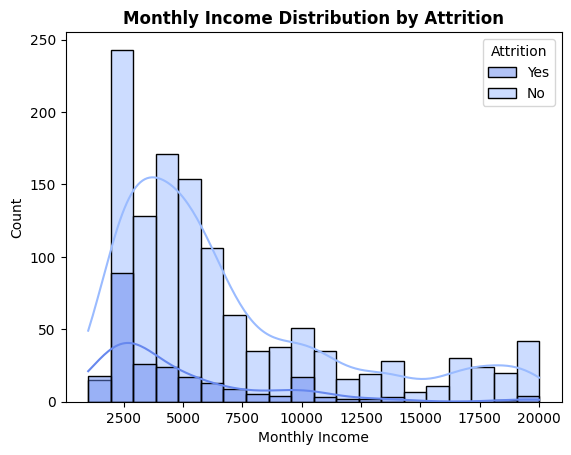

In [22]:

sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', kde=True)
plt.title('Monthly Income Distribution by Attrition', fontweight = "bold")
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()